# Visualizing Time Series in Python

## Initialization

### Importing Libraries

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra and math functions
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # also for data visualization
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for plotting ACF and PACF
import statsmodels.api as sm  # for decomposing time series

#import custom functions 
from basic.basic_functions import download_file, set_folders

In [2]:
# Setting the style for the plots
plt.style.use('ggplot')
# Setting the size of the plots
plt.rcParams['figure.figsize'] = 16, 8
# Setting the font size
plt.rcParams.update({'font.size': 14})

#### Setting up Drive

In [3]:
base_folder,data,archive,output,model = set_folders()

Not Running on Colab
Base Folder is C:\Users\abdul\OneDrive\Documents\MSBA
Data Folder is C:\Users\abdul\OneDrive\Documents\MSBA\data_sets
Archive Folder is C:\Users\abdul\OneDrive\Documents\MSBA\archive
Output Folder is C:\Users\abdul\OneDrive\Documents\MSBA\output
Model Folder is C:\Users\abdul\OneDrive\Documents\MSBA\model_output
The path to the custom functions is C:/Users/abdul/OneDrive/Documents/MSBA/custom_functions
The working directory is c:\Users\abdul\OneDrive\Documents\MSBA\notebooks\Time_Series_Analysis


### Importing data 

In [4]:
download_file('https://assets.datacamp.com/production/repositories/1259/datasets/580f81133e1aa0803bdd2adda1670b4efff9778a/ch1_discoveries.csv', data/'ch1_discoveries.csv')
download_file('https://assets.datacamp.com/production/repositories/1259/datasets/88073ba2ec84224b732314d97b9862b049930f32/ch2_co2_levels.csv', data/'ch1_co2_levels.csv')
download_file('https://assets.datacamp.com/production/repositories/1259/datasets/f8f1084c73032207abfc6b8a2499cab410bcfd62/ch3_airline_passengers.csv', data/'ch3_airline_passengers.csv')
download_file('https://assets.datacamp.com/production/repositories/1259/datasets/1e1cd4384a858ebd0a47d995bb0b963bfee09afd/ch4_meat.csv', data/'ch4_meat.csv')
download_file('https://assets.datacamp.com/production/repositories/1259/datasets/1c6b4a977a3c14f2a00c2d74694b208d9ac86443/ch5_employment.csv', data/'ch5_employment.csv')

Downloaded file saved to C:\Users\abdul\OneDrive\Documents\MSBA\data_sets\ch1_discoveries.csv
Downloaded file saved to C:\Users\abdul\OneDrive\Documents\MSBA\data_sets\ch1_co2_levels.csv
Downloaded file saved to C:\Users\abdul\OneDrive\Documents\MSBA\data_sets\ch3_airline_passengers.csv
Downloaded file saved to C:\Users\abdul\OneDrive\Documents\MSBA\data_sets\ch4_meat.csv
Downloaded file saved to C:\Users\abdul\OneDrive\Documents\MSBA\data_sets\ch5_employment.csv


## Plotting Time Series

### Simple plotting excercises

In [5]:
# Read the data into a DataFrame
discoveries = pd.read_csv(data/'ch1_discoveries.csv', parse_dates=['date'])
discoveries.set_index('date', inplace=True)
discoveries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1860-01-01 to 1959-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       100 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


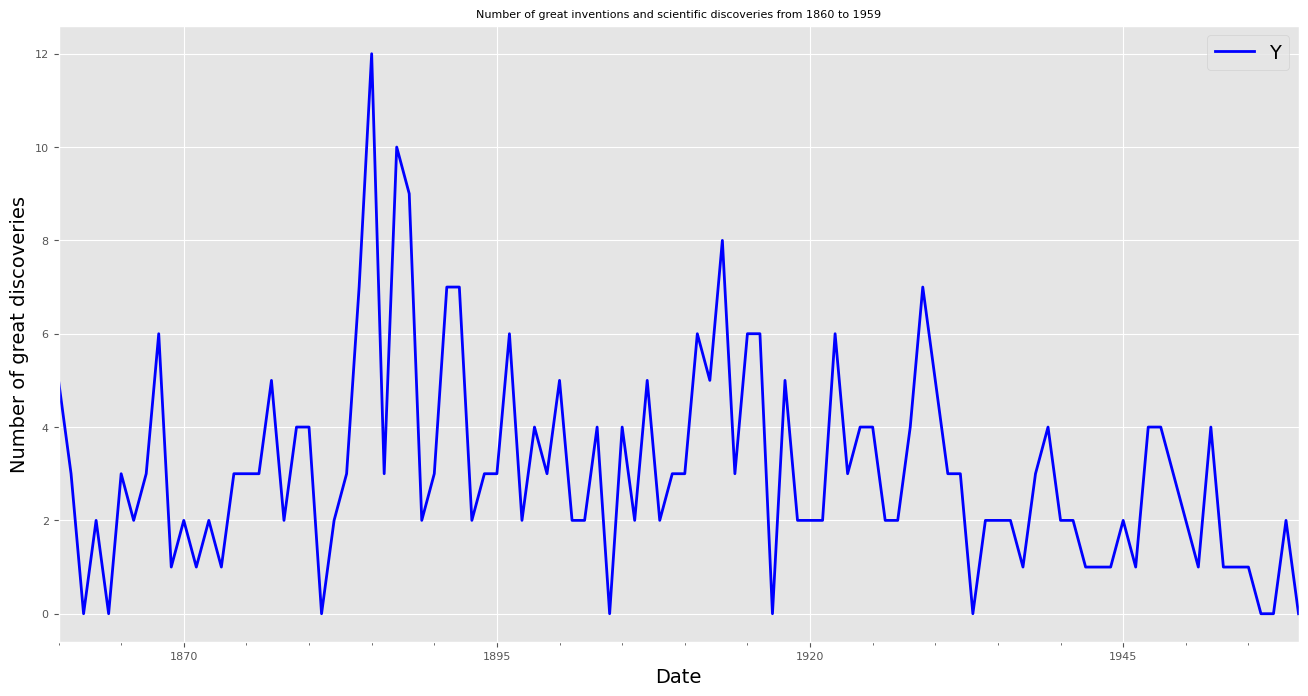

In [6]:
# discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(16,8), linewidth=2, fontsize=8)
# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)
# Specify the x-axis label in your plot
ax.set_xlabel('Date')
# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')
# Show plot
plt.show()

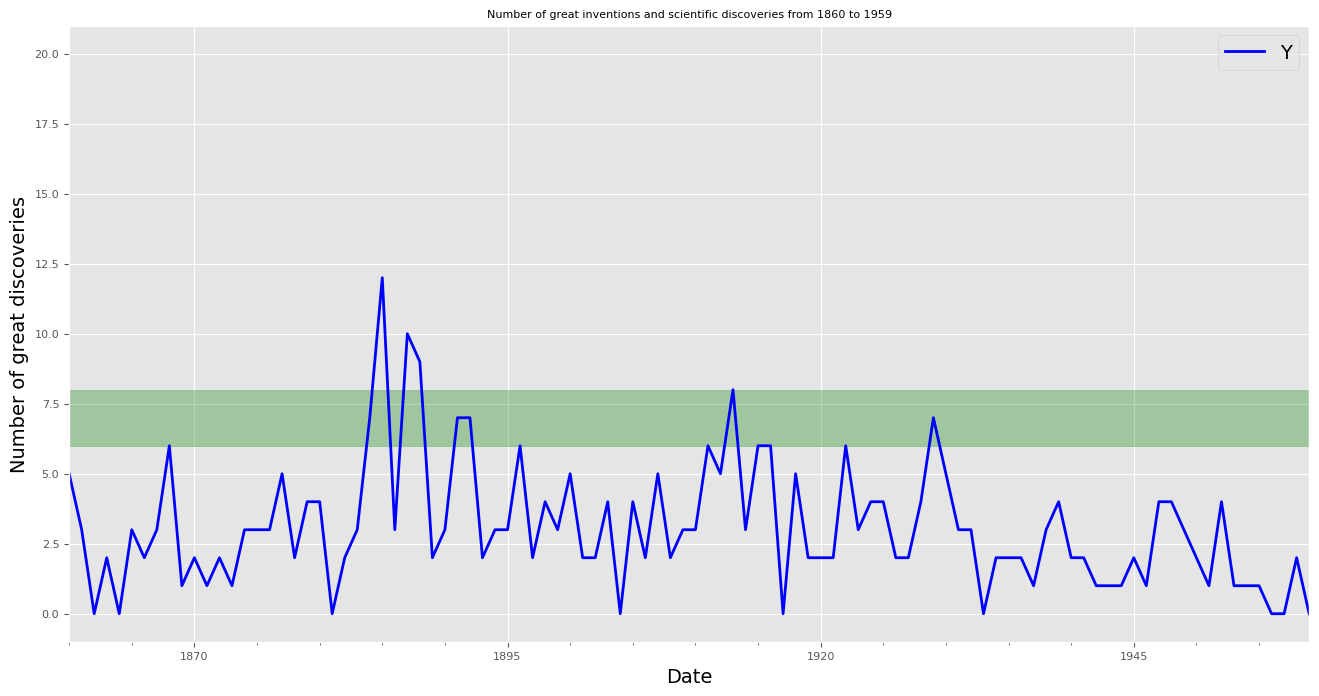

In [7]:
# Create the plot
ax = discoveries.plot(color='blue', figsize=(16, 8), linewidth=2, fontsize=8)

# Add a vertical red shaded region
ax.fill_between([pd.to_datetime('1900-01-01'), pd.to_datetime('1915-01-01')], [0,0], [20,20], color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

# Specify the title, x-axis label, and y-axis label in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)
ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')

# Show the plot
plt.show()

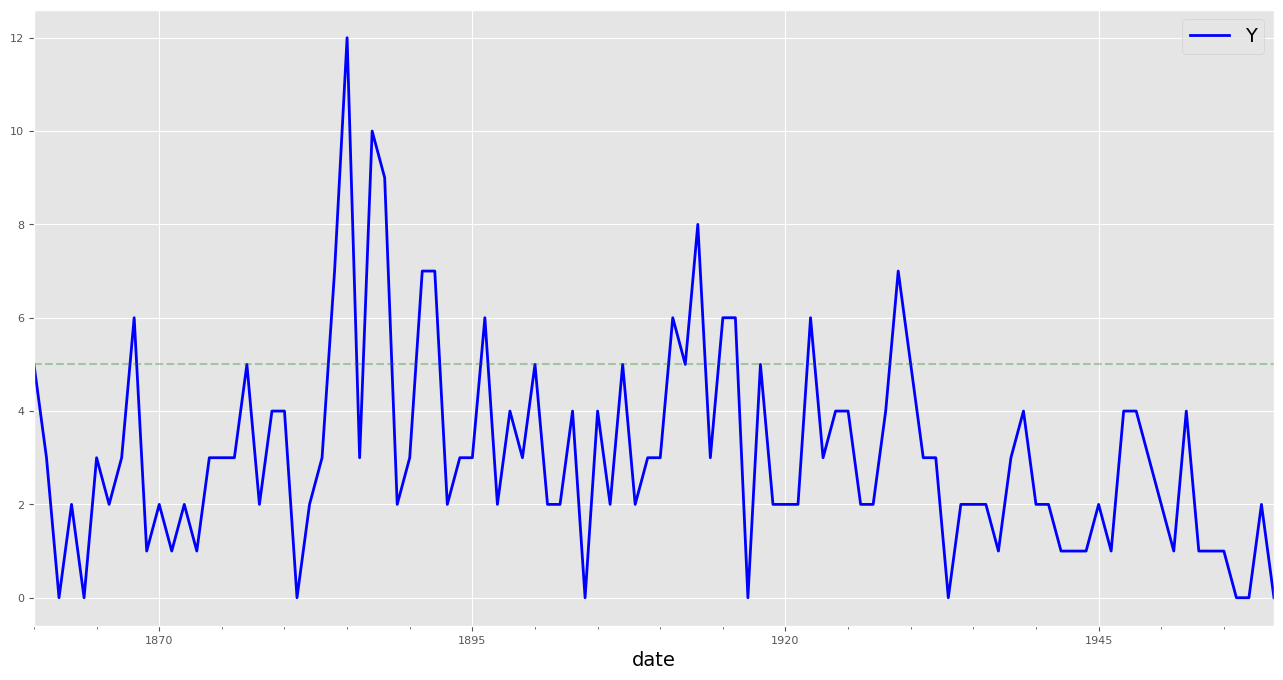

In [8]:
# discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(16,8), linewidth=2, fontsize=8)
# Add a vertical red shaded region
# ax.axvline(pd.to_datetime('1900-01-01'), color='red', alpha=0.3, linestyle='--')
# Add a horizontal green shaded region
ax.axhline(5, color='green', alpha=0.3, linestyle='--')
plt.show()
# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)
# Specify the x-axis label in your plot
ax.set_xlabel('Date')
# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')
# Show plot
plt.show()

### Summary Statistics and Diagnostics

In [9]:
co2_levels = pd.read_csv(data/'ch1_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
# Check for missing values
print(co2_levels.isnull().sum(),'\n')
# Use backfill to fill missing values
co2_levels = co2_levels.fillna(method='bfill')
# Check for missing values
print(co2_levels.isnull().sum())

# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

co2    59
dtype: int64 

co2    0
dtype: int64
               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


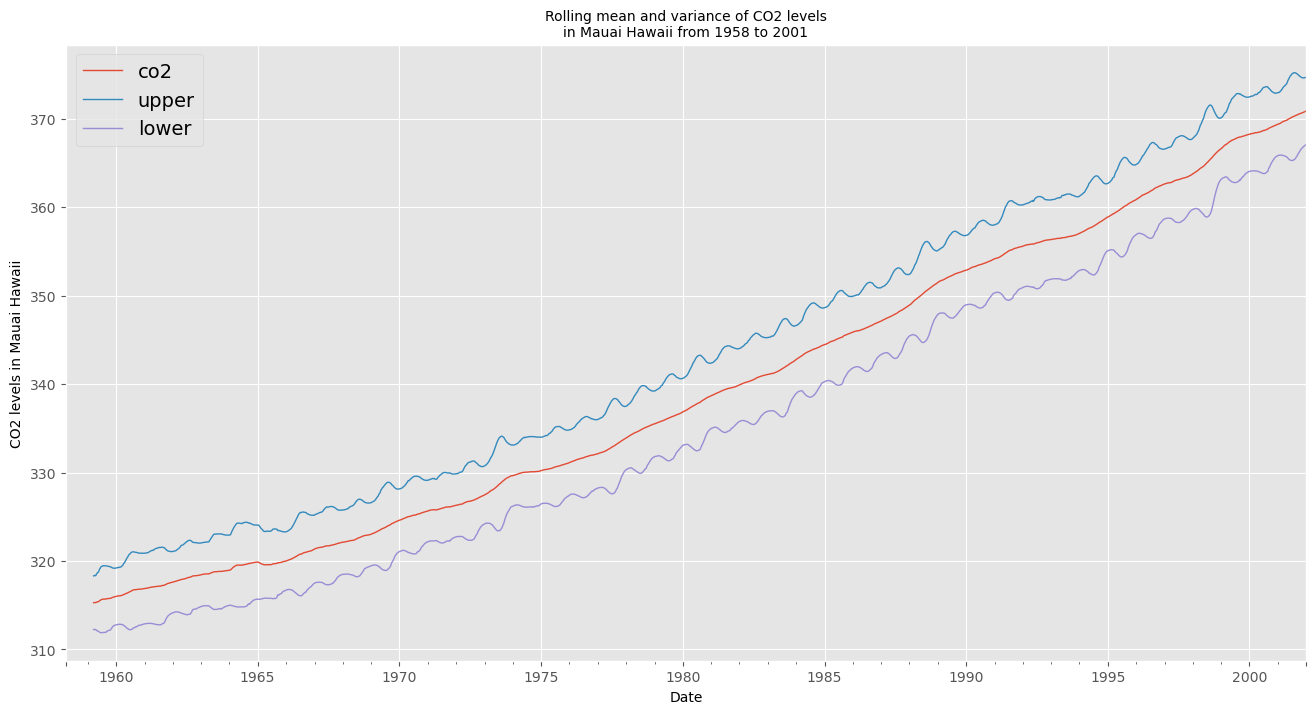

In [10]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()
# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()
# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (2 * mstd['co2'])
# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (2 * mstd['co2'])

ax = ma.plot(linewidth=1, fontsize=10)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

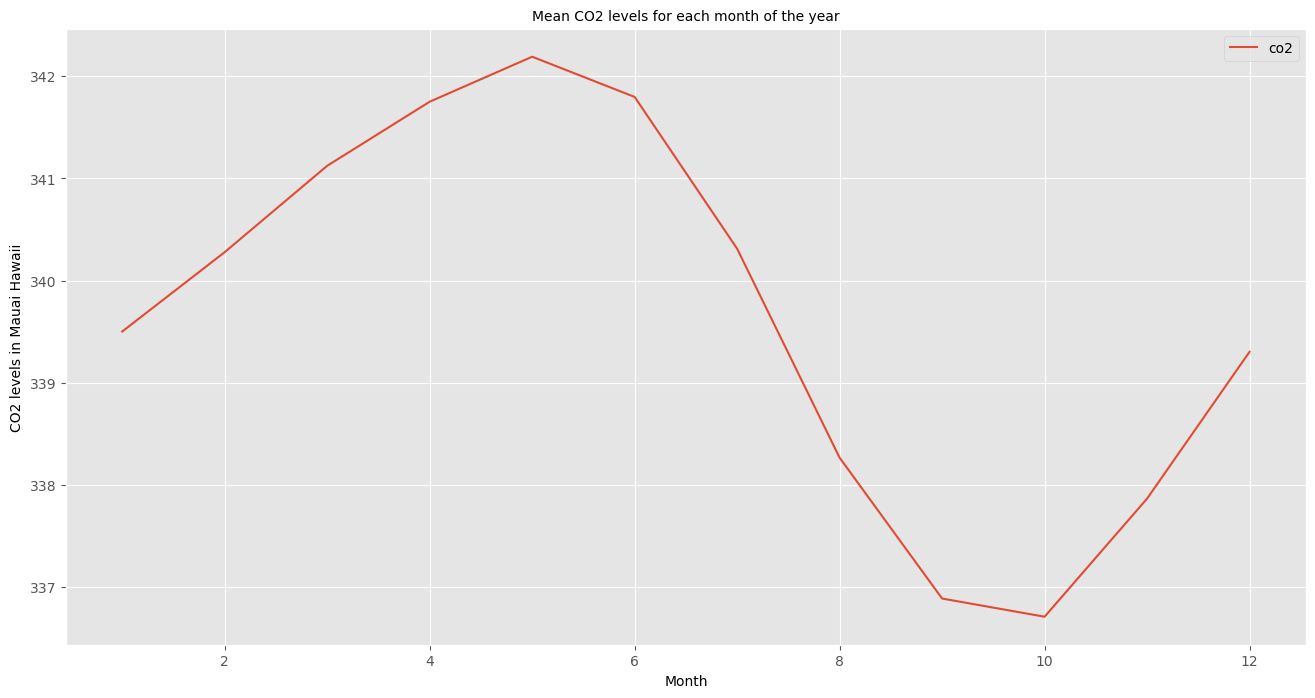

In [11]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month
# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()
# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=10)
# Specify the fontsize on the legend
plt.legend(fontsize=10)
plt.xlabel('Month', fontsize=10)
plt.ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
plt.title('Mean CO2 levels for each month of the year', fontsize=10)
# Show plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


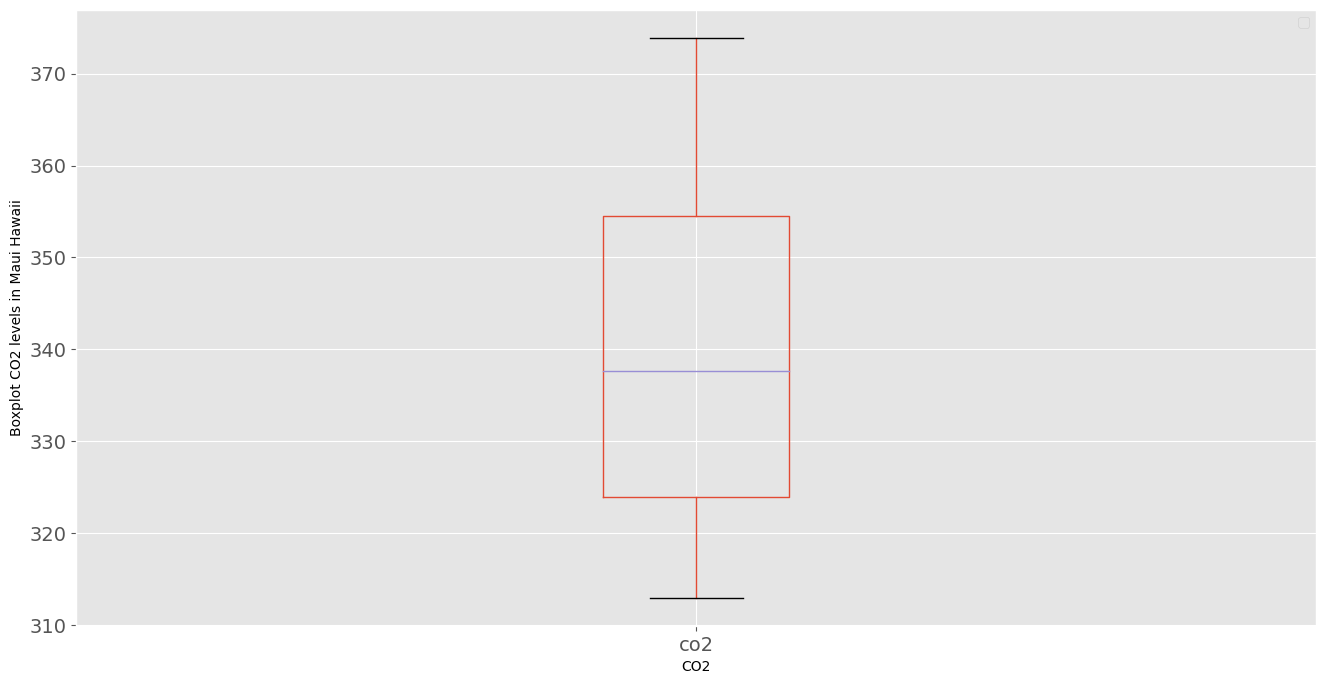

In [12]:
# Generate a boxplot
ax = co2_levels.boxplot()
# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

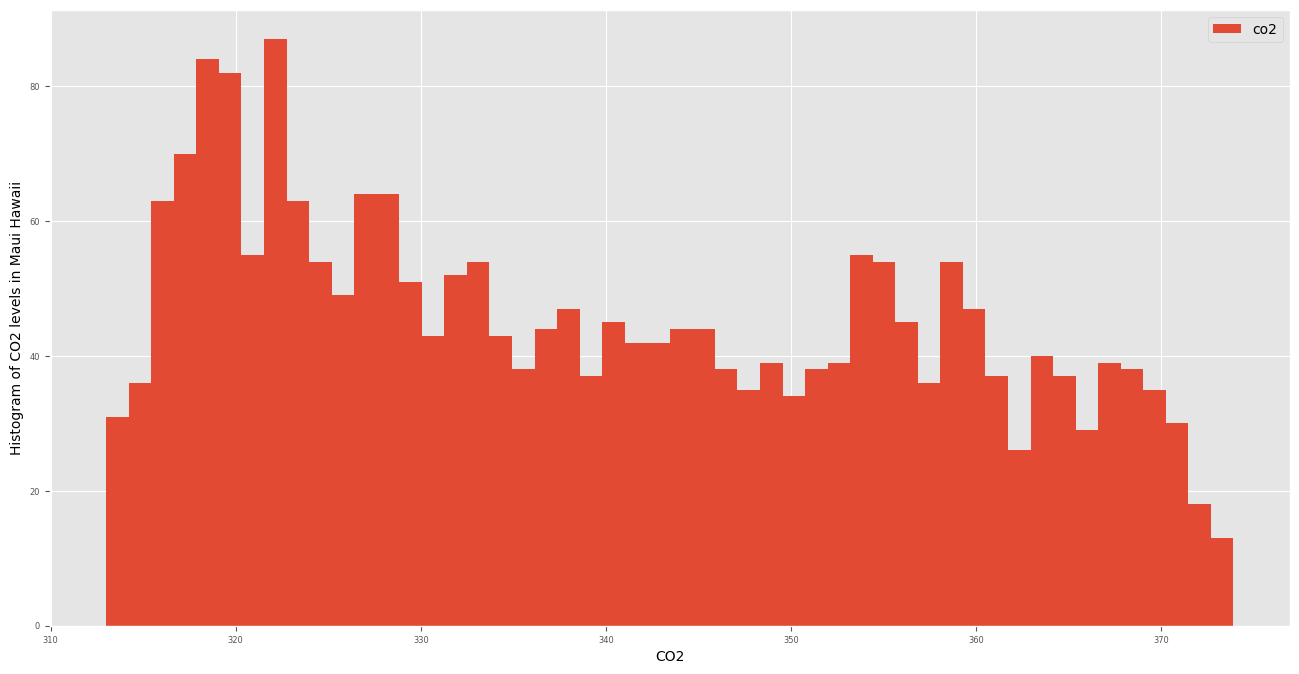

In [13]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)
# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

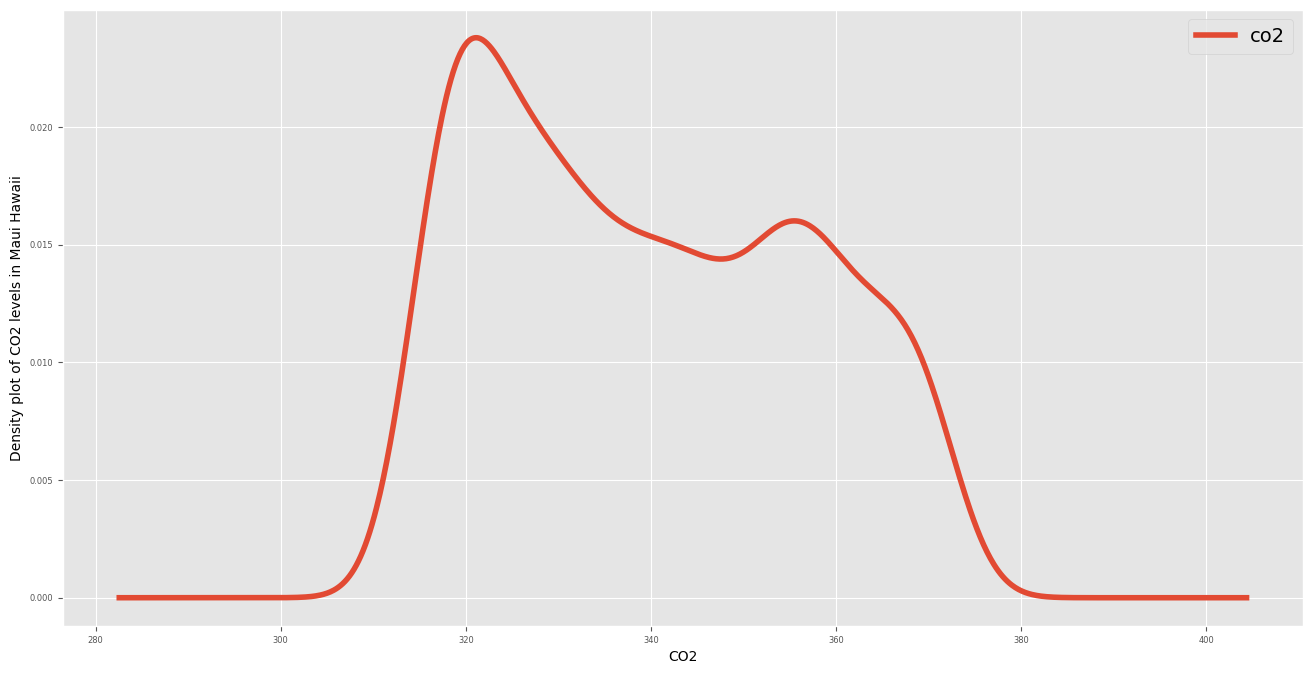

In [14]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)
# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)
# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)
plt.show()

### Autocorrelation

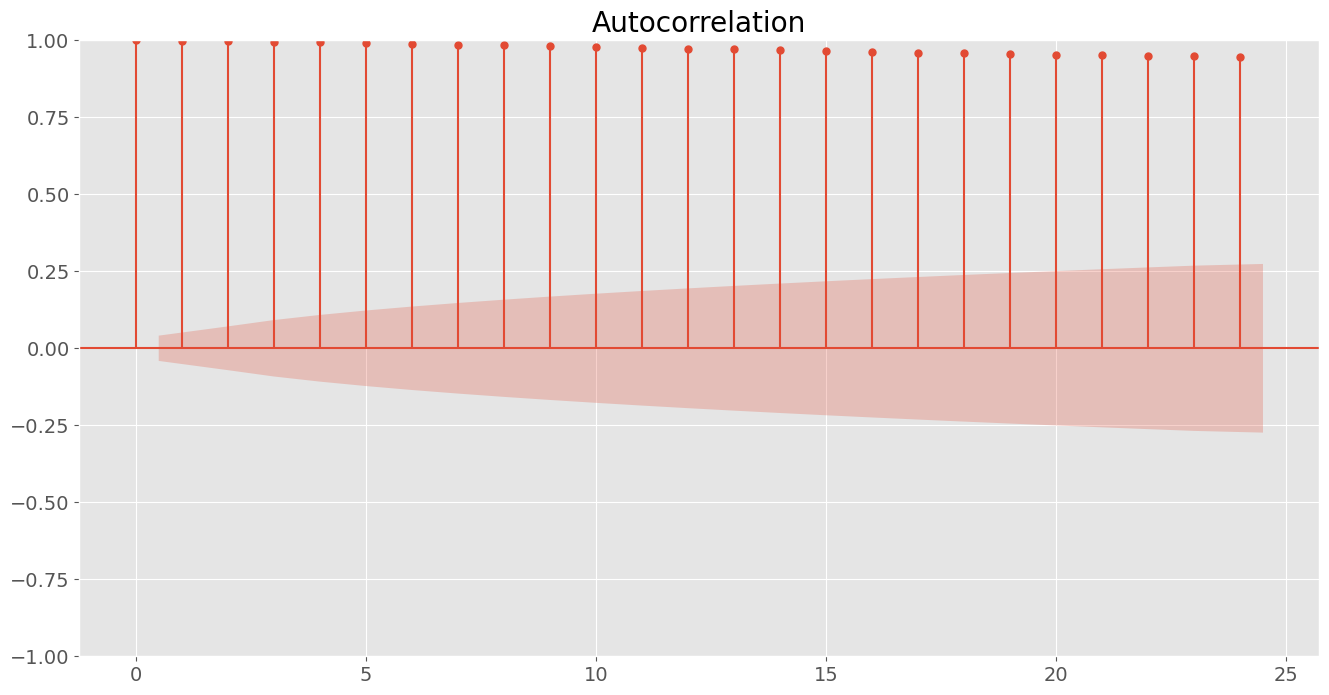

In [15]:
# Display the autocorrelation plot of your time series
fig = plot_acf(co2_levels['co2'], lags=24)
# Show plot
plt.show()

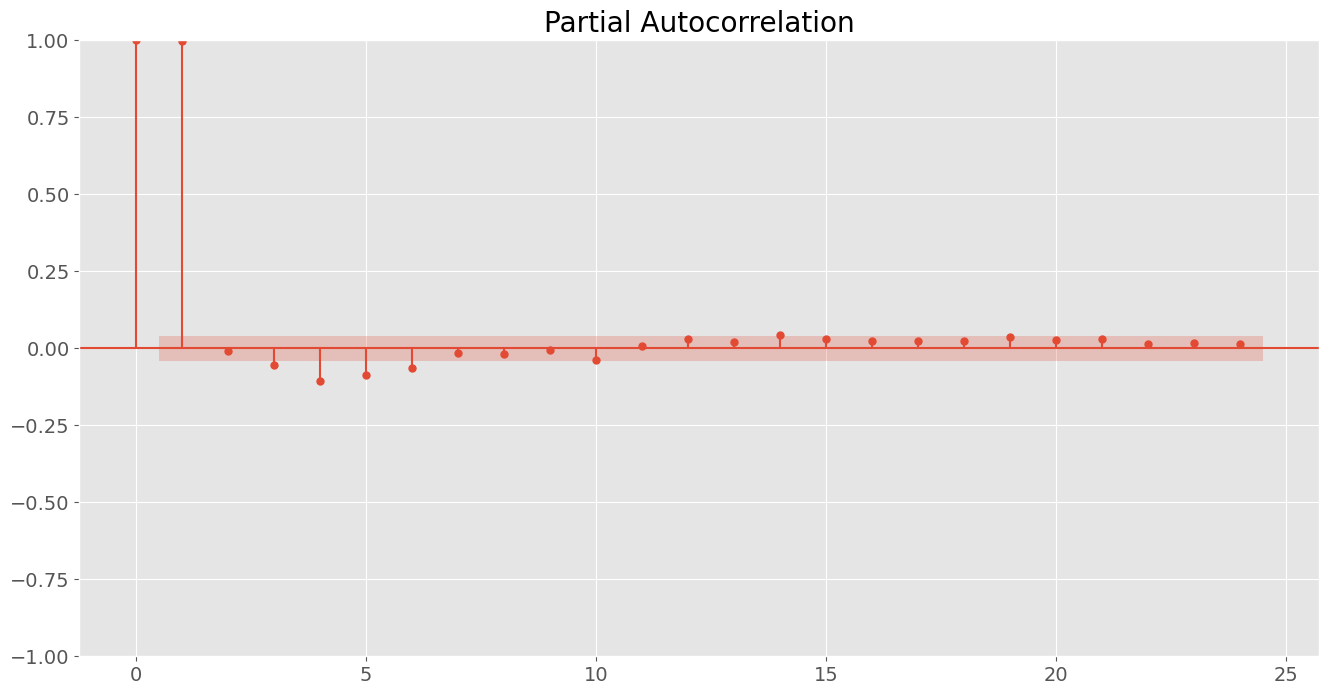

In [16]:
# Display the autocorrelation plot of your time series
fig = plot_pacf(co2_levels['co2'], lags=24)

# The result of this plot shows the data is correlated with itself at lag 1, 4, 5 6 and 7
# Show plot
plt.show()

### Seasonality, Trend and Noise in Time Series data

In [17]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)
# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


#### Plotting Seasonality

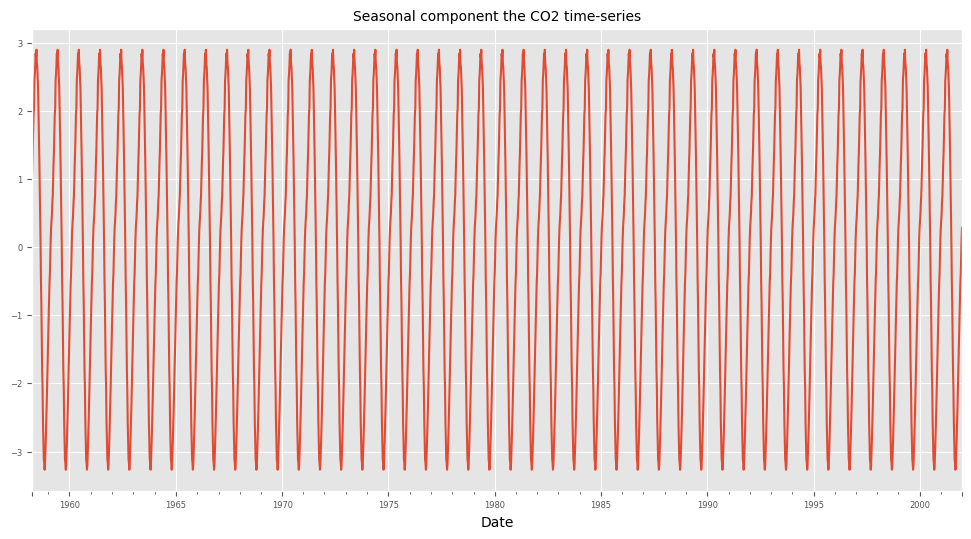

In [18]:
# Extract the trend component
seasonal = decomposition.seasonal
# Plot the values of the trend
ax = seasonal.plot(figsize=(12, 6), fontsize=6)
# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

#### Ploting Trend

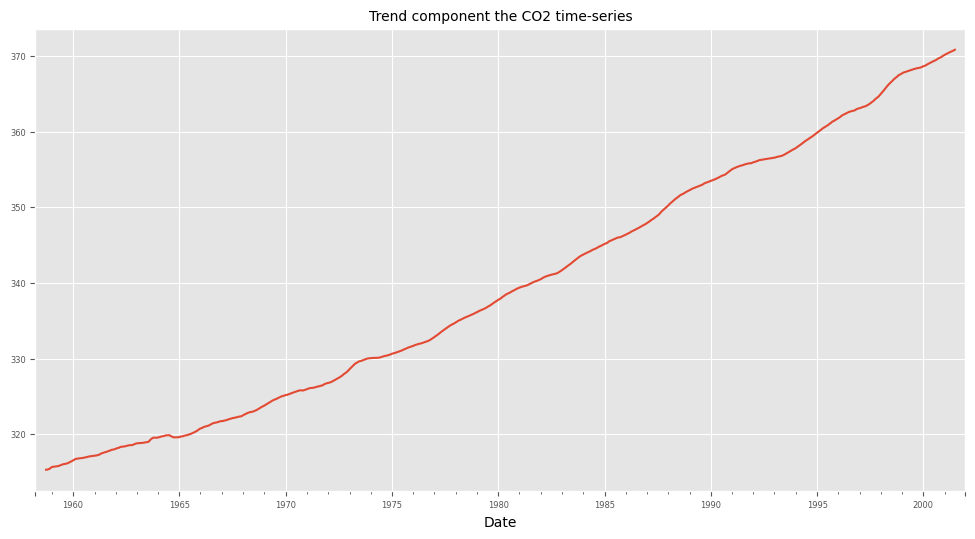

In [19]:
# Extract the trend component
trend = decomposition.trend
# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)
# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Trend component the CO2 time-series', fontsize=10)
plt.show()

### Examining Airline Data

AirPassengers    0
dtype: int64 

       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000 



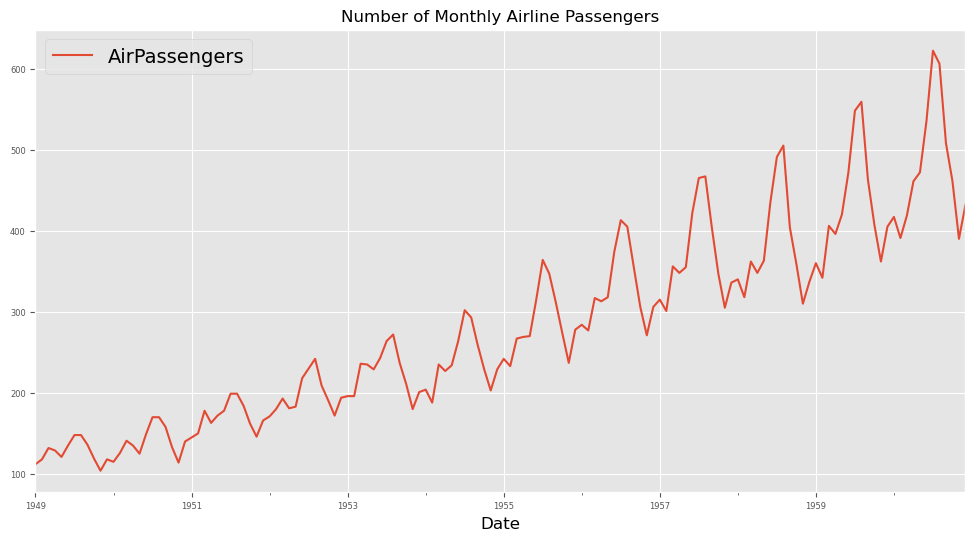

In [20]:
# import data from the ch3_airline_passengers.csv file
airline = pd.read_csv(data/'ch3_airline_passengers.csv', parse_dates=['Month'], index_col='Month')
# Check for missing values
print(airline.isnull().sum(),'\n')
# Print out summary statistics of the airline DataFrame
print(airline.describe(),'\n')

ax = airline.plot(figsize=(12, 6), fontsize=6)
ax.axvline(pd.to_datetime('1955-12-01'),color='red', linestyle='--')
# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

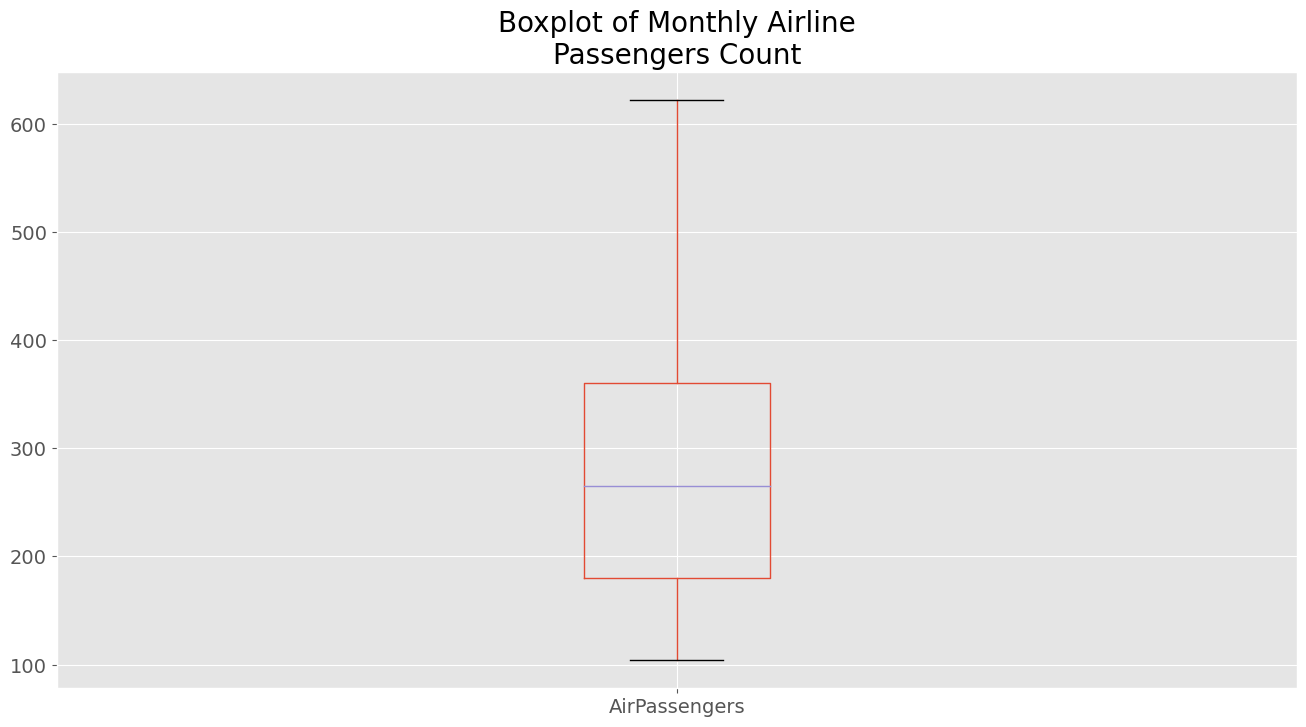

In [21]:
# Display boxplot of airline values
ax2 = airline.boxplot()
# Specify the title of your plot
ax2.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

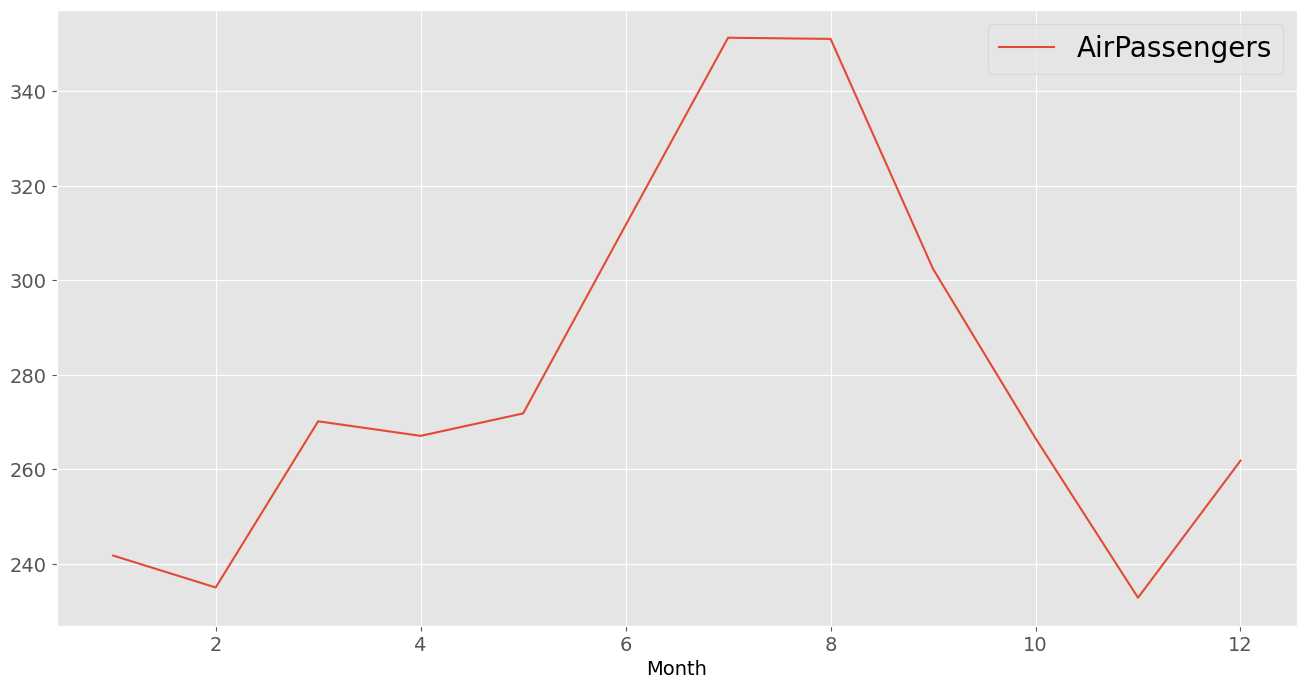

In [22]:
# Get month for each dates from the index of airline
index_month = airline.index.month
# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()
# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

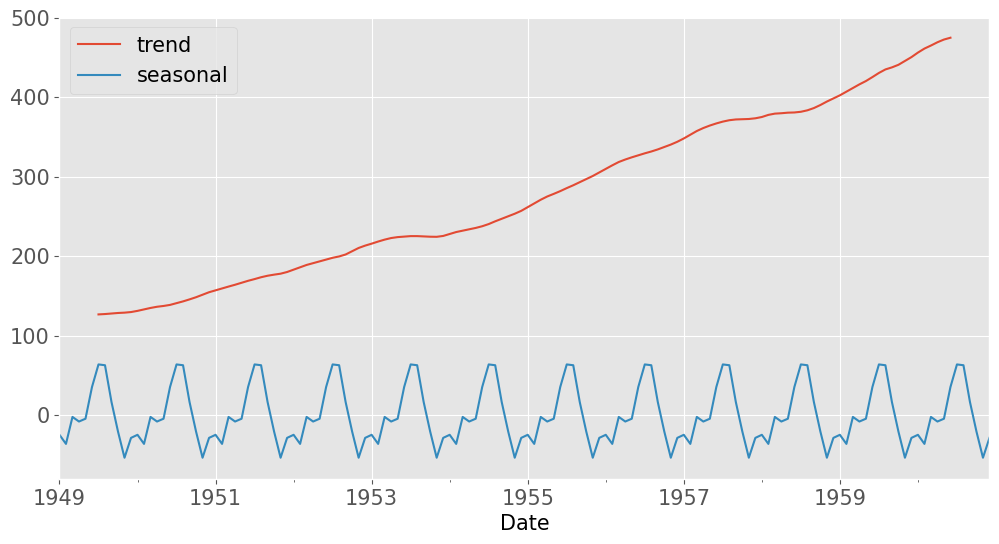

In [23]:
# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

airline_decomposed = pd.concat([trend, seasonal], axis=1)
# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

### Plotting mutiple Time-Series

In [24]:
meat = pd.read_csv(data/'ch4_meat.csv', parse_dates=['date'], index_col='date')
# Check for missing values
print(meat.isna().sum(),'\n')
# Print the summary statistics of the DataFrame
print(meat.describe())
# Create dataframe of meat mean values
meat_mean = round(meat.mean(axis=0),2).to_frame().T
meat_mean.index = ['mean']

beef                 0
veal                 0
pork                 0
lamb_and_mutton      0
broilers           192
other_chicken      684
turkey             192
dtype: int64 

              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.000000   636.350000   
50%    1853.000000   40.000000  1156.000000        31.000000  1211.300000   
75%    2070.000000   79.000000  1466.000000        55.000000  2426.650000   
max    2512.000000  215.000000  2210.400000       109.000000  3383.800000   

       other_chicken      turkey  
count     143.000000  635.000000  
mean       43.033566  292.814646  
std         3.867141  162

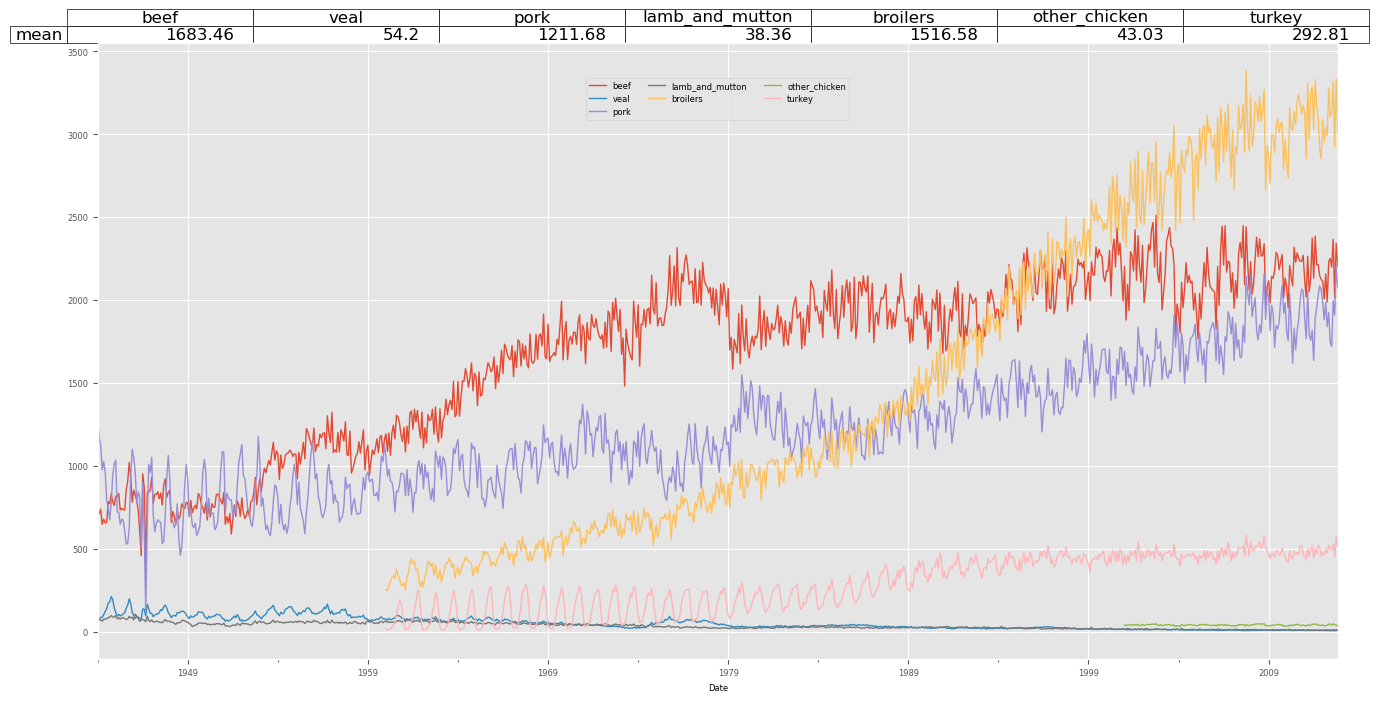

In [25]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)
# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)
# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')
# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

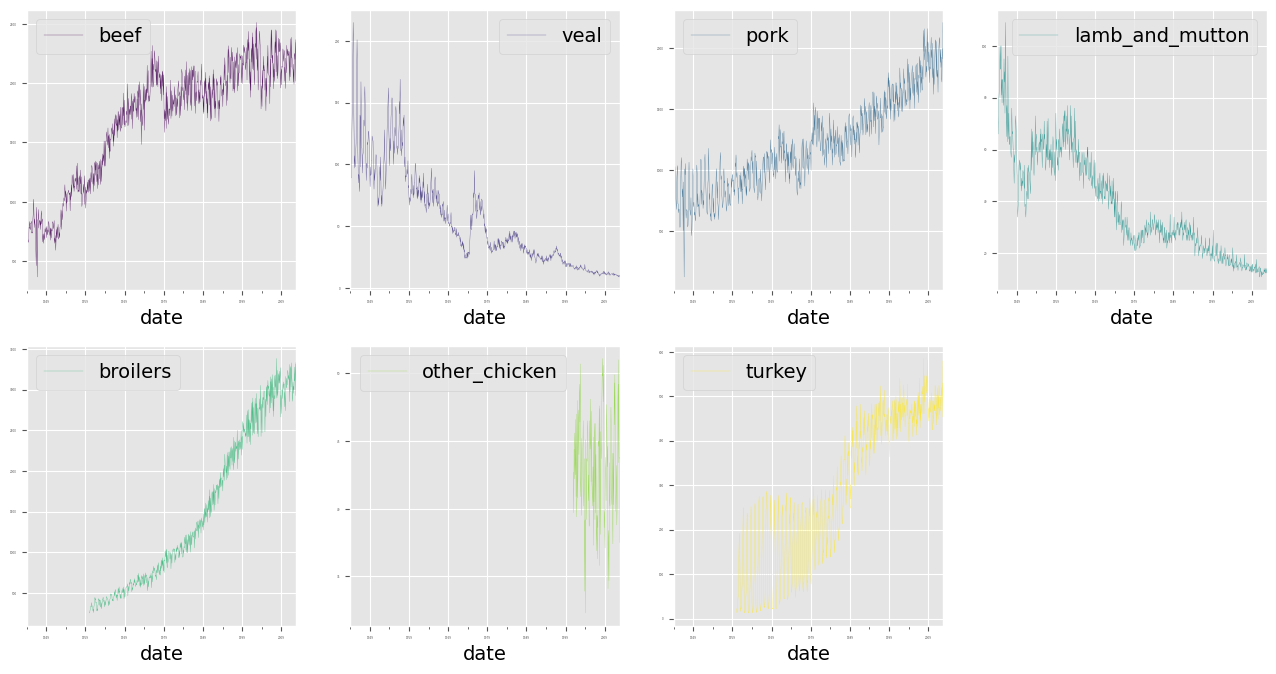

In [26]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=True, 
          linewidth=0.2)

plt.show()

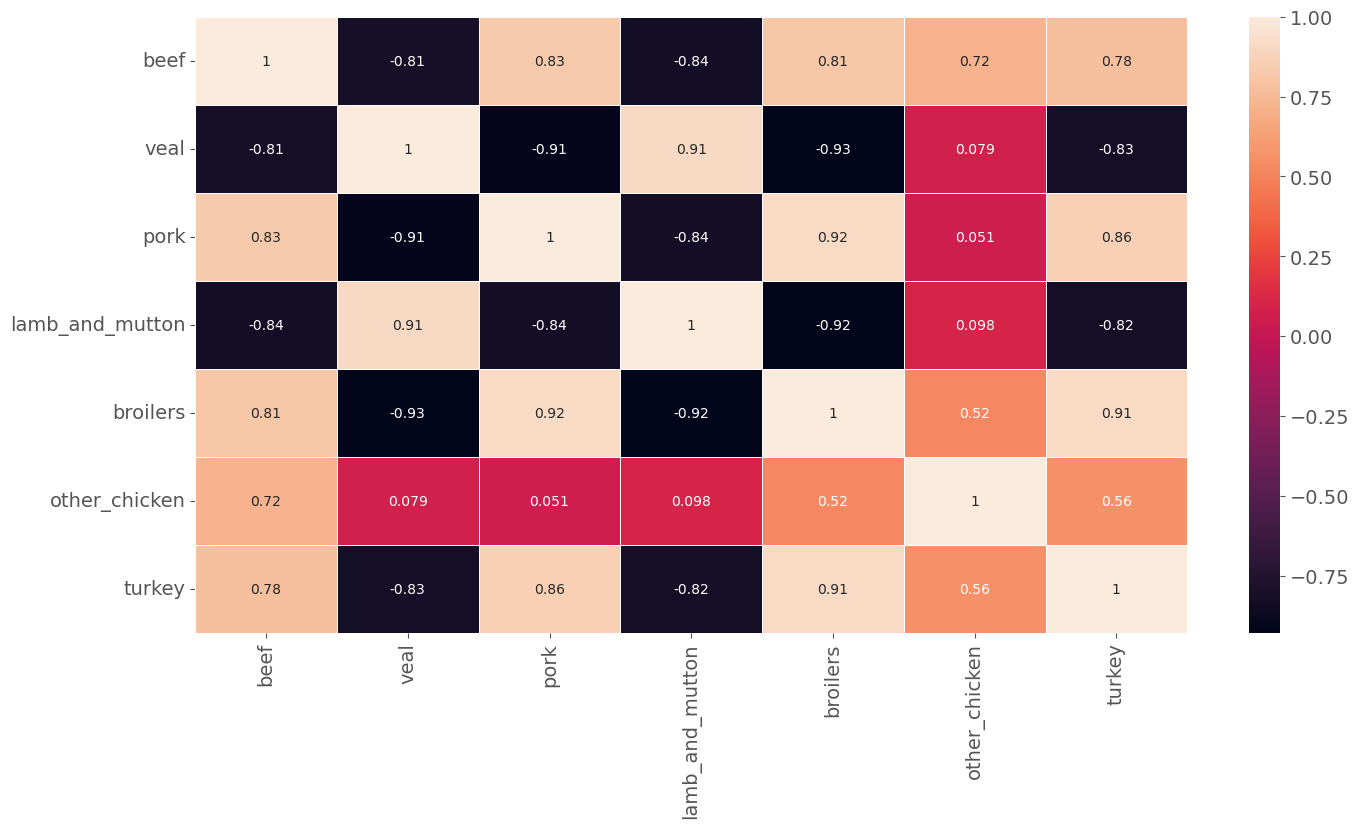

In [27]:
# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')
# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

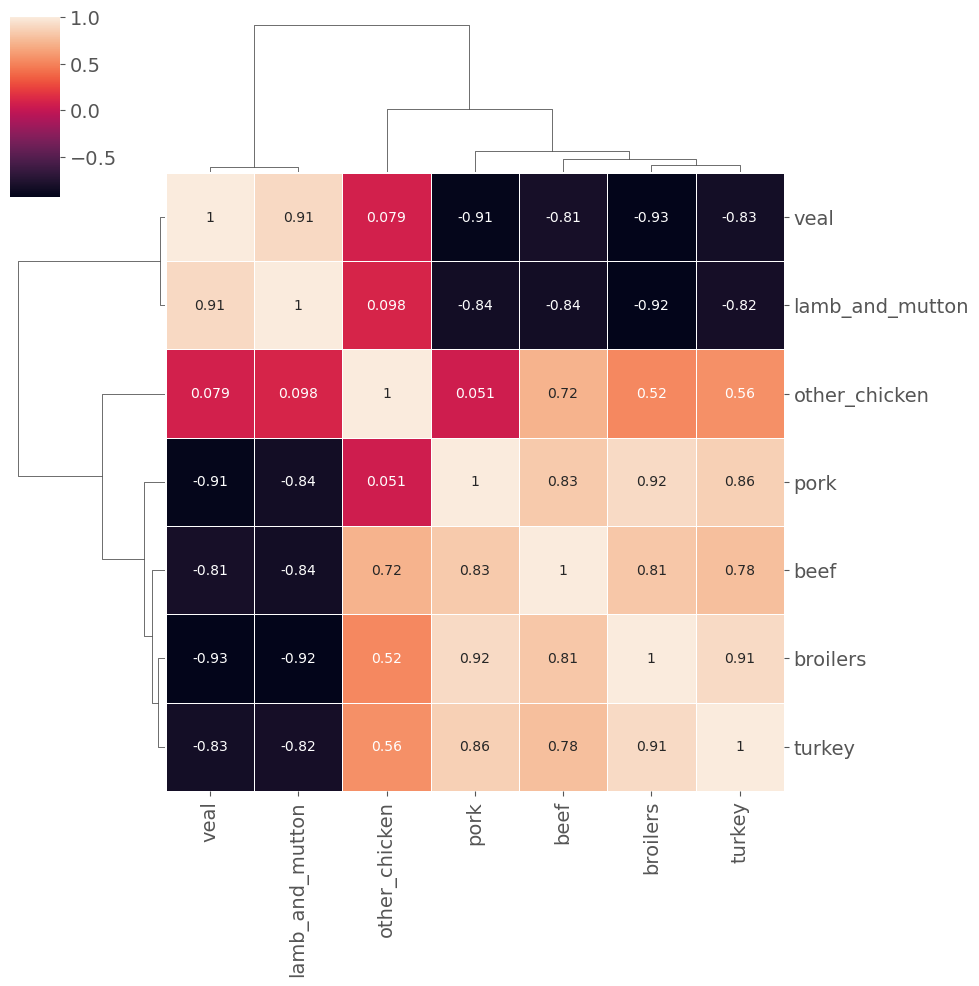

In [28]:
# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.clustermap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### Case Study: Jobs Dataset Analysis and Visualization

#### Performing Basic Analysis and Exploring Data

Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object 



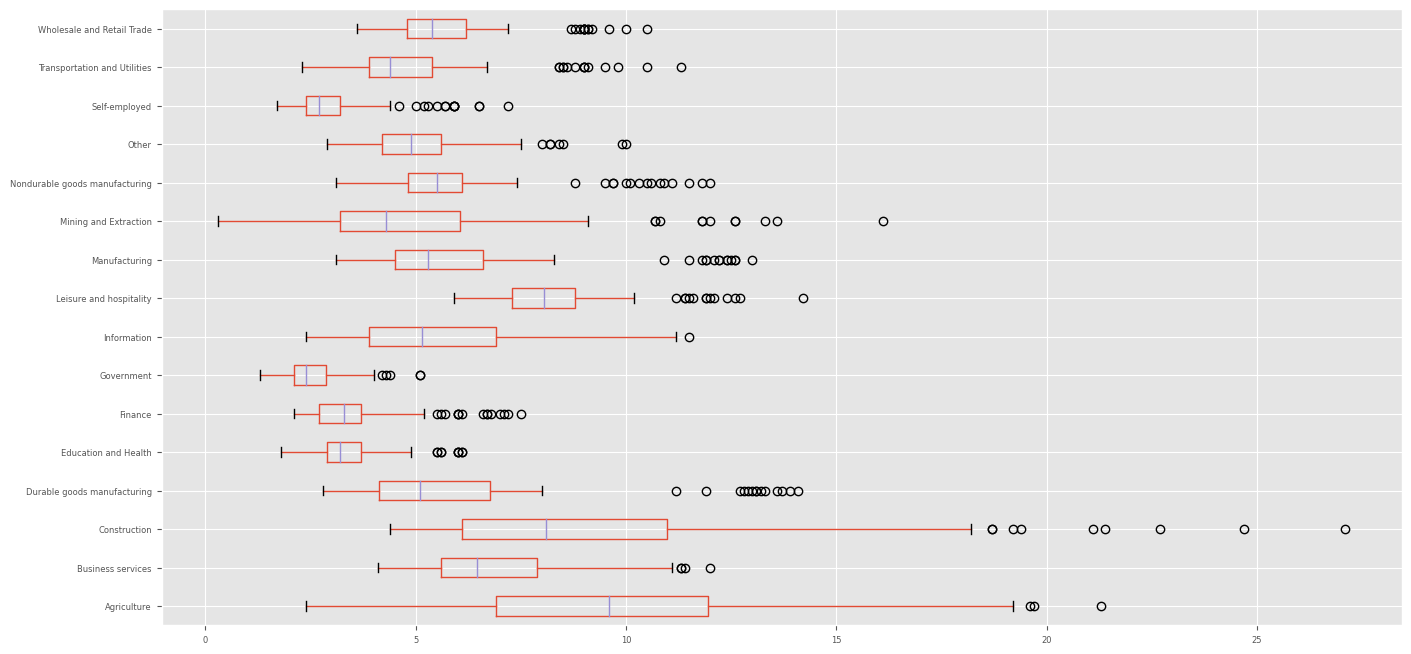

In [29]:
jobs = pd.read_csv(data/'ch5_employment.csv', parse_dates=['datestamp'], index_col='datestamp')
print(jobs.dtypes,'\n')
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

#### Plotting Data on to observe patterns

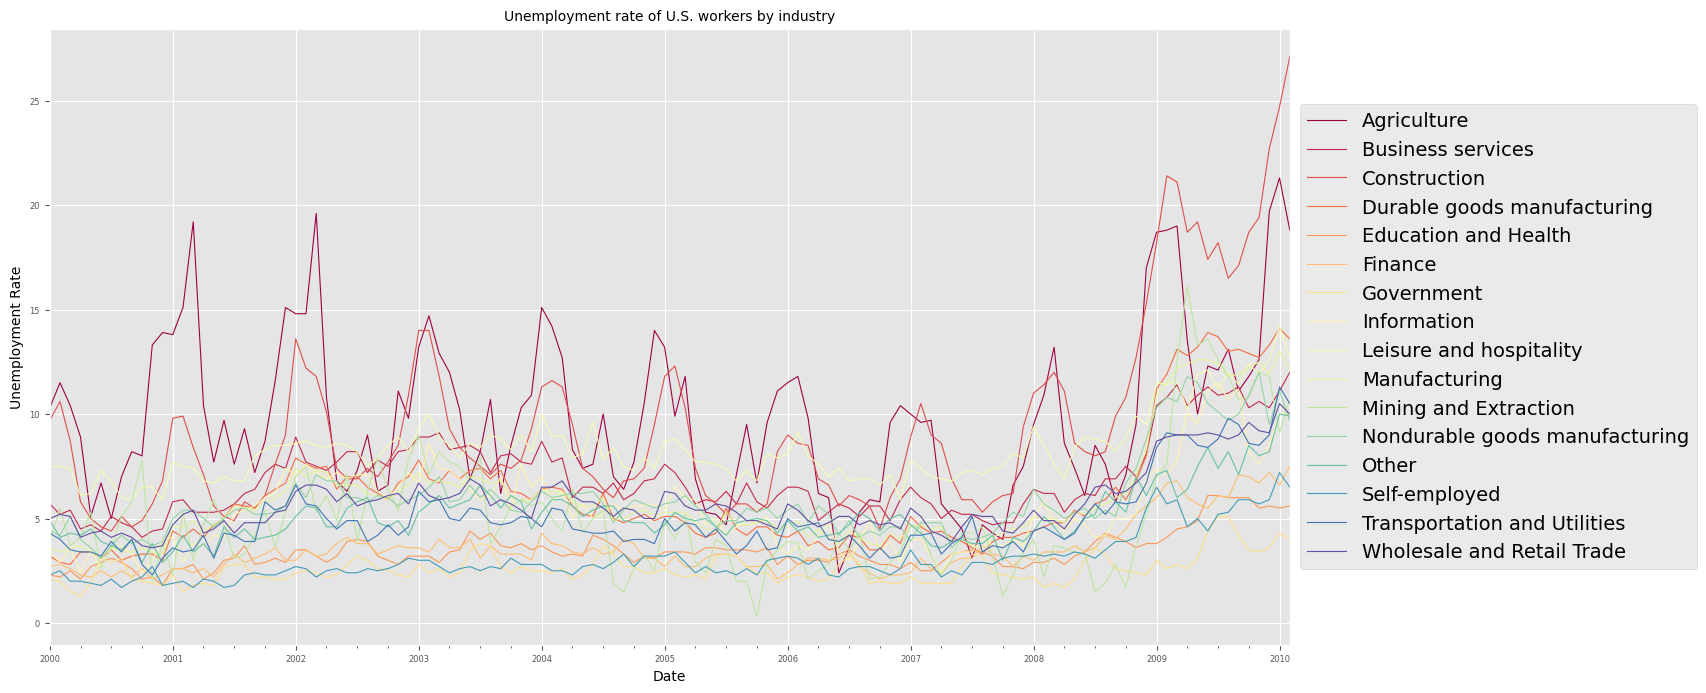

In [30]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
# ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
# ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

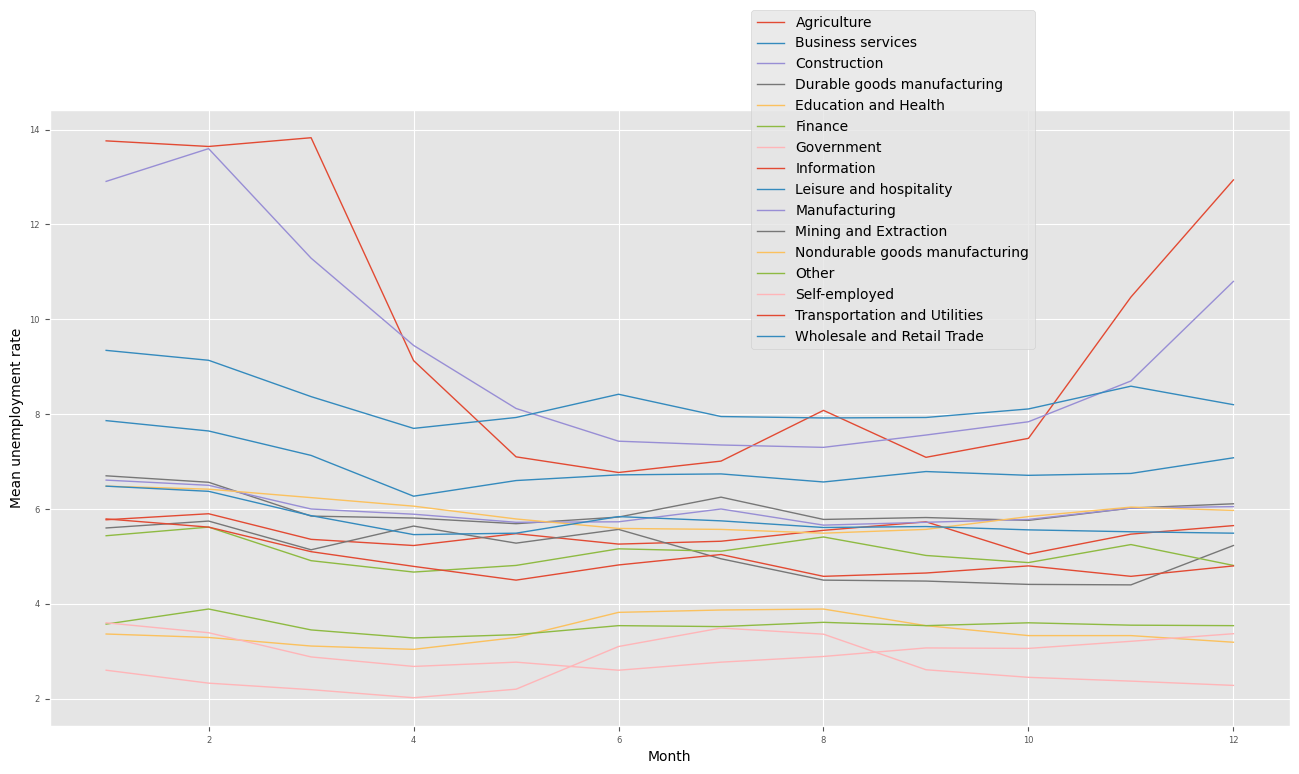

In [31]:
# Extract the month from the index of jobs
index_month = jobs.index.month
# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()
# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)
# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

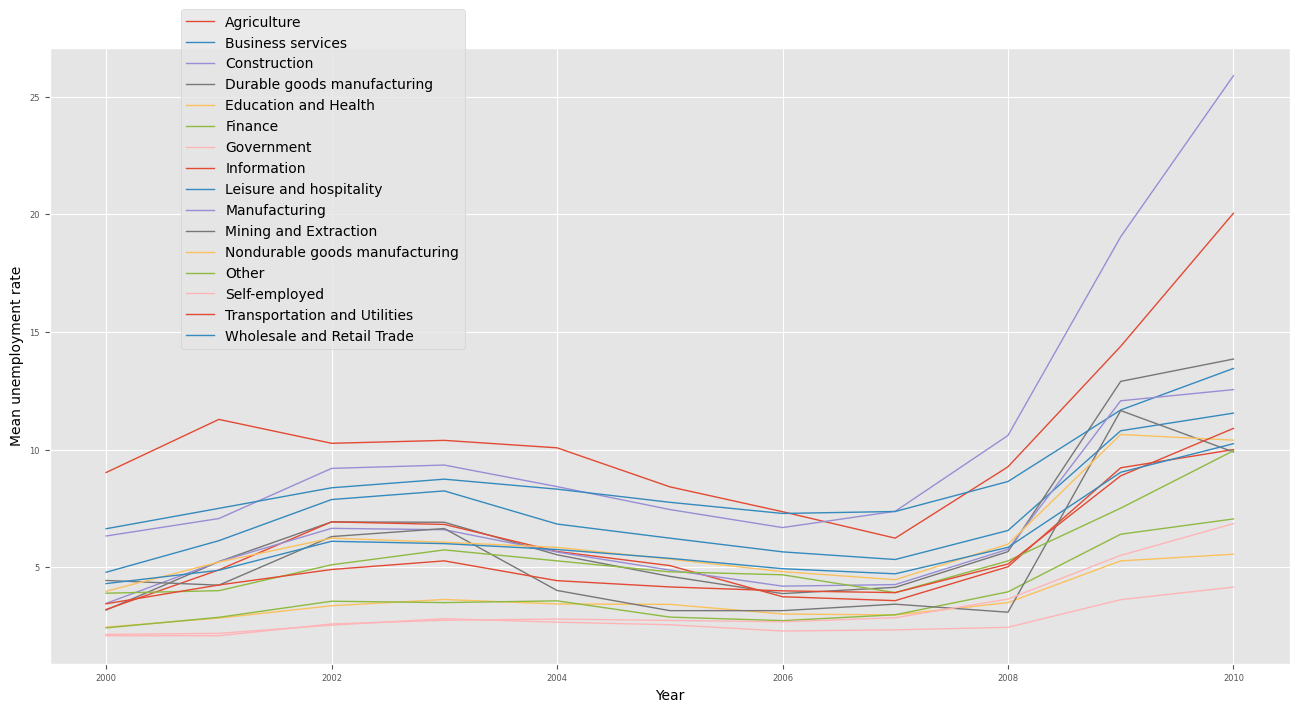

In [32]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

#### Performing Seasonal Decomposition

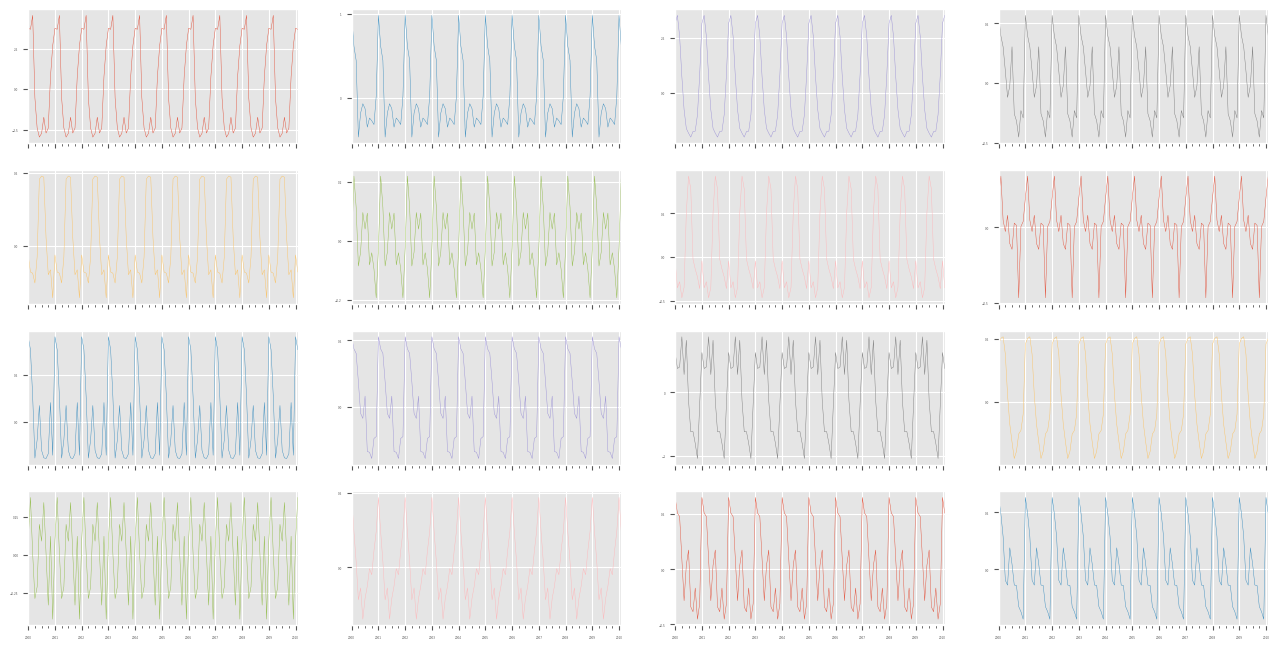

In [33]:
# Initialize dictionary
jobs_decomp = {}
jobs_decomp_plot = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition
    jobs_decomp_plot[ts] = jobs_decomp[ts].seasonal

decomp_df = pd.DataFrame(jobs_decomp_plot)
decomp_df.index.name = None

decomp_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

#### Calculating and Visualizing Correlation

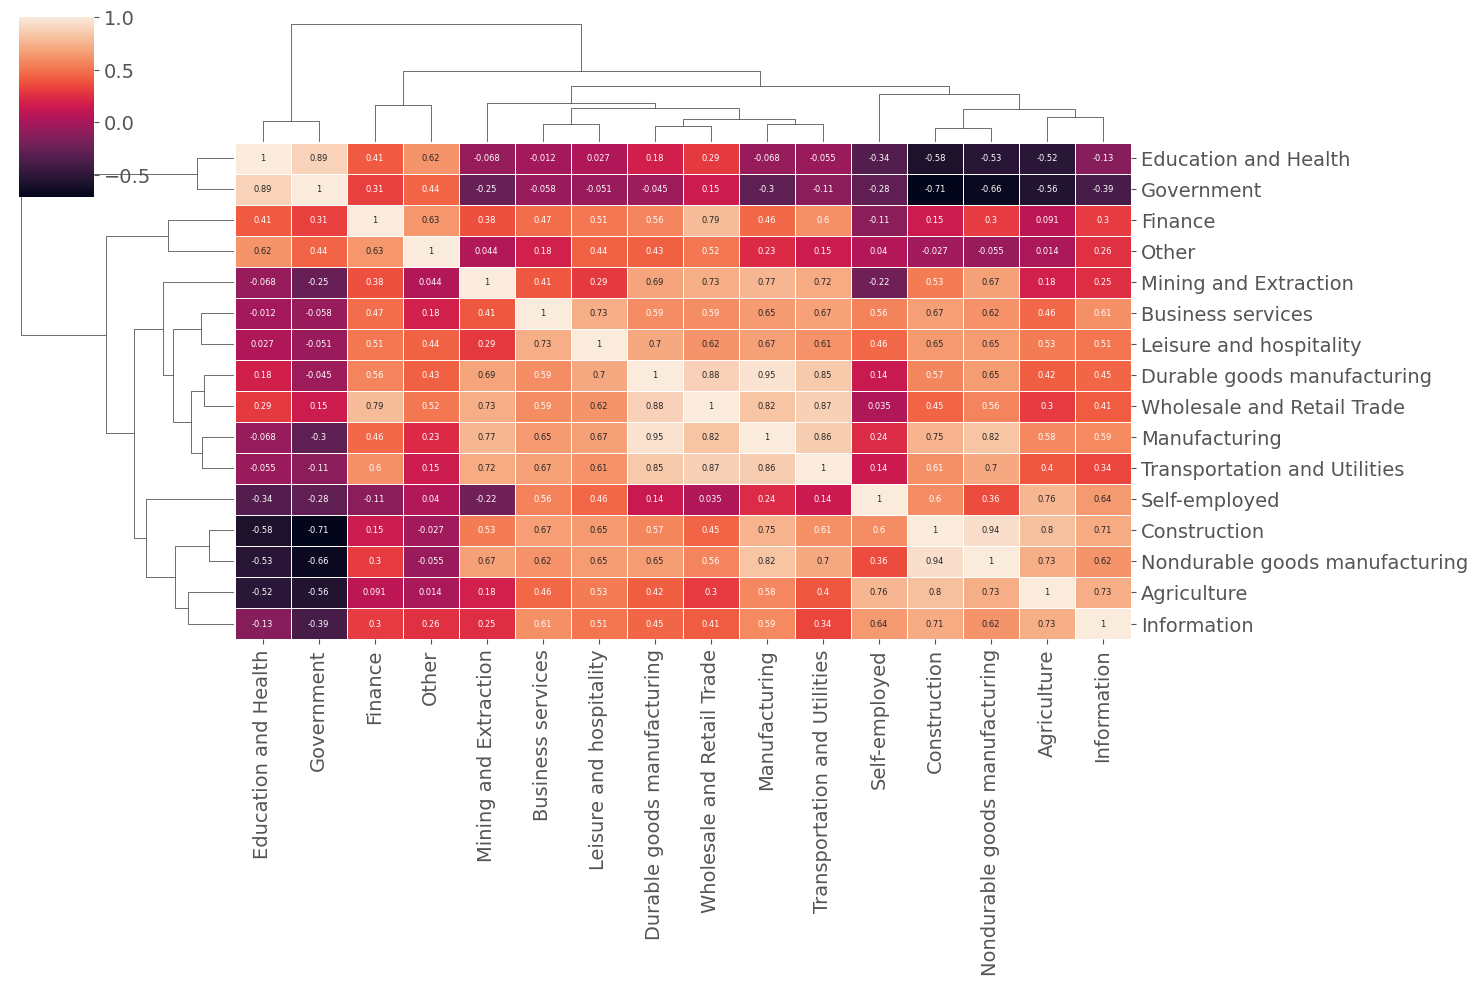

In [34]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = decomp_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 6}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()